## 1. Zmodyfikowany DES, dyfuzja konfuzja, słabe klucze


### Zmodyfikowany DES, wyświetla pośredni wynik w każej z rund w postaci binarnej

In [46]:
# Python3 code for the above approach
 
# Hexadecimal to binary conversion
 
def hex2bin(s):
    mp = {'0': "0000",
          '1': "0001",
          '2': "0010",
          '3': "0011",
          '4': "0100",
          '5': "0101",
          '6': "0110",
          '7': "0111",
          '8': "1000",
          '9': "1001",
          'A': "1010",
          'B': "1011",
          'C': "1100",
          'D': "1101",
          'E': "1110",
          'F': "1111"}
    bin = ""
    for i in range(len(s)):
        bin = bin + mp[s[i]]
    return bin
 
# Binary to hexadecimal conversion
 
 
def bin2hex(s):
    mp = {"0000": '0',
          "0001": '1',
          "0010": '2',
          "0011": '3',
          "0100": '4',
          "0101": '5',
          "0110": '6',
          "0111": '7',
          "1000": '8',
          "1001": '9',
          "1010": 'A',
          "1011": 'B',
          "1100": 'C',
          "1101": 'D',
          "1110": 'E',
          "1111": 'F'}
    hex = ""
    for i in range(0, len(s), 4):
        ch = ""
        ch = ch + s[i]
        ch = ch + s[i + 1]
        ch = ch + s[i + 2]
        ch = ch + s[i + 3]
        hex = hex + mp[ch]
 
    return hex
 
# Binary to decimal conversion
 
 
def bin2dec(binary):
 
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal
 
# Decimal to binary conversion
 
 
def dec2bin(num):
    res = bin(num).replace("0b", "")
    if(len(res) % 4 != 0):
        div = len(res) / 4
        div = int(div)
        counter = (4 * (div + 1)) - len(res)
        for i in range(0, counter):
            res = '0' + res
    return res
 
# Permute function to rearrange the bits
 
 
def permute(k, arr, n):
    permutation = ""
    for i in range(0, n):
        permutation = permutation + k[arr[i] - 1]
    return permutation
 
# shifting the bits towards left by nth shifts
 
 
def shift_left(k, nth_shifts):
    s = ""
    for i in range(nth_shifts):
        for j in range(1, len(k)):
            s = s + k[j]
        s = s + k[0]
        k = s
        s = ""
    return k
 
# calculating xow of two strings of binary number a and b
 
 
def xor(a, b):
    ans = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            ans = ans + "0"
        else:
            ans = ans + "1"
    return ans
 
 
# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
                60, 52, 44, 36, 28, 20, 12, 4,
                62, 54, 46, 38, 30, 22, 14, 6,
                64, 56, 48, 40, 32, 24, 16, 8,
                57, 49, 41, 33, 25, 17, 9, 1,
                59, 51, 43, 35, 27, 19, 11, 3,
                61, 53, 45, 37, 29, 21, 13, 5,
                63, 55, 47, 39, 31, 23, 15, 7]
 
# Expansion D-box Table
exp_d = [32, 1, 2, 3, 4, 5, 4, 5,
         6, 7, 8, 9, 8, 9, 10, 11,
         12, 13, 12, 13, 14, 15, 16, 17,
         16, 17, 18, 19, 20, 21, 20, 21,
         22, 23, 24, 25, 24, 25, 26, 27,
         28, 29, 28, 29, 30, 31, 32, 1]
 
# Straight Permutation Table
per = [16,  7, 20, 21,
       29, 12, 28, 17,
       1, 15, 23, 26,
       5, 18, 31, 10,
       2,  8, 24, 14,
       32, 27,  3,  9,
       19, 13, 30,  6,
       22, 11,  4, 25]
 
# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
         [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
         [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
         [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],
 
        [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
         [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
         [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
         [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],
 
        [[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
         [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
         [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
         [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],
 
        [[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
         [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
         [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
         [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],
 
        [[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
         [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
         [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
         [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],
 
        [[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
         [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
         [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
         [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],
 
        [[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
         [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
         [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
         [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],
 
        [[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
         [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
         [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
         [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]
 
# Final Permutation Table
final_perm = [40, 8, 48, 16, 56, 24, 64, 32,
              39, 7, 47, 15, 55, 23, 63, 31,
              38, 6, 46, 14, 54, 22, 62, 30,
              37, 5, 45, 13, 53, 21, 61, 29,
              36, 4, 44, 12, 52, 20, 60, 28,
              35, 3, 43, 11, 51, 19, 59, 27,
              34, 2, 42, 10, 50, 18, 58, 26,
              33, 1, 41, 9, 49, 17, 57, 25]
 
 
def encrypt(pt, rkb, rk, num_rounds=16, print_rounds=True):
    pt = hex2bin(pt)
 
    # Initial Permutation
    pt = permute(pt, initial_perm, 64)
    # print("After initial permutation", bin2hex(pt))
    if print_rounds:
        print("After initial permutation", pt)
 
    # Splitting
    left = pt[0:32]
    right = pt[32:64]
    # for i in range(0, 16):
    for i in range(0, num_rounds):
        #  Expansion D-box: Expanding the 32 bits data into 48 bits
        right_expanded = permute(right, exp_d, 48)
 
        # XOR RoundKey[i] and right_expanded
        xor_x = xor(right_expanded, rkb[i])
 
        # S-boxex: substituting the value from s-box table by calculating row and column
        sbox_str = ""
        for j in range(0, 8):
            row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
            col = bin2dec(
                int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
            val = sbox[j][row][col]
            sbox_str = sbox_str + dec2bin(val)
 
        # Straight D-box: After substituting rearranging the bits
        sbox_str = permute(sbox_str, per, 32)
 
        # XOR left and sbox_str
        result = xor(left, sbox_str)
        left = result
 
        # Swapper
        # if(i != 15):
        if(i != num_rounds - 1):
            left, right = right, left
        if print_rounds:
            print("Round ", i + 1, "\n left: ", left,
                "\n right: ", right, "\n round key: ", hex2bin(rk[i]))
        # print("Round ", i + 1, " ", bin2hex(left),
        #       " ", bin2hex(right), " ", rk[i])
 
    # Combination
    combine = left + right
 
    # Final permutation: final rearranging of bits to get cipher text
    cipher_text = permute(combine, final_perm, 64)
    return cipher_text

def generate_round_keys(key):
    # Key generation
    # --hex to binary
    key = hex2bin(key)
    
    # --parity bit drop table
    keyp = [57, 49, 41, 33, 25, 17, 9,
            1, 58, 50, 42, 34, 26, 18,
            10, 2, 59, 51, 43, 35, 27,
            19, 11, 3, 60, 52, 44, 36,
            63, 55, 47, 39, 31, 23, 15,
            7, 62, 54, 46, 38, 30, 22,
            14, 6, 61, 53, 45, 37, 29,
            21, 13, 5, 28, 20, 12, 4]
    
    # getting 56 bit key from 64 bit using the parity bits
    key = permute(key, keyp, 56)
    
    # Number of bit shifts
    shift_table = [1, 1, 2, 2,
                2, 2, 2, 2,
                1, 2, 2, 2,
                2, 2, 2, 1]
    
    # Key- Compression Table : Compression of key from 56 bits to 48 bits
    key_comp = [14, 17, 11, 24, 1, 5,
                3, 28, 15, 6, 21, 10,
                23, 19, 12, 4, 26, 8,
                16, 7, 27, 20, 13, 2,
                41, 52, 31, 37, 47, 55,
                30, 40, 51, 45, 33, 48,
                44, 49, 39, 56, 34, 53,
                46, 42, 50, 36, 29, 32]

    # Splitting
    left = key[0:28]    # rkb for RoundKeys in binary
    right = key[28:56]  # rk for RoundKeys in hexadecimal

    rkb = []
    rk = []
    for i in range(0, 16):
        # Shifting the bits by nth shifts by checking from shift table
        left = shift_left(left, shift_table[i])
        right = shift_left(right, shift_table[i])
    
        # Combination of left and right string
        combine_str = left + right
    
        # Compression of key from 56 to 48 bits
        round_key = permute(combine_str, key_comp, 48)
    
        rkb.append(round_key)
        rk.append(bin2hex(round_key))
    
    return rkb, rk
 


In [47]:
pt = "123456ABCD132536"
key = "AABB09182736CCDD"

rkb, rk = generate_round_keys(key)

print("Plain Text: ", hex2bin(pt))
print("Encryption")
cipher_text = bin2hex(encrypt(pt, rkb, rk))
print("Cipher Text : ", cipher_text)
 
print("Decryption")
rkb_rev = rkb[::-1]
rk_rev = rk[::-1]
text = bin2hex(encrypt(cipher_text, rkb_rev, rk_rev))
print("Plain Text : ", text)

# This code is contributed by Aditya Jain

Plain Text:  0001001000110100010101101010101111001101000100110010010100110110
Encryption
After initial permutation 0001010010100111110101100111100000011000110010100001100010101101
Round  1 
 left:  00011000110010100001100010101101 
 right:  01011010011110001110001110010100 
 round key:  000110010100110011010000011100101101111010001100
Round  2 
 left:  01011010011110001110001110010100 
 right:  01001010000100100001000011110110 
 round key:  010001010110100001011000000110101011110011001110
Round  3 
 left:  01001010000100100001000011110110 
 right:  10111000000010001001010110010001 
 round key:  000001101110110110100100101011001111010110110101
Round  4 
 left:  10111000000010001001010110010001 
 right:  00100011011001110111100111000010 
 round key:  110110100010110100000011001010110110111011100011
Round  5 
 left:  00100011011001110111100111000010 
 right:  10100001010110100100101110000111 
 round key:  011010011010011000101001111111101100100100010011
Round  6 
 left:  10100001010110100

### Wyniki dyfuzji i konfuzji obliczone w następujący sposób:
- każdy bit wiadomości lub klucza po kolei negujemy
- w każdej iteracji liczymy ile bitów różni, między szyfrem z oryginału a tym po zmianie (po 1, 2 ... 16 rundach)
- liczymy średni wynik dzieląc sumę różniących się bitów dla każdej rundy przez 64 (długość wiadomości lub klucza)

In [50]:
def calculate_avalanche_score(binary_str1, binary_str2):
    """Calculate how many bits are different between two binary strings"""
    if len(binary_str1) != len(binary_str2):
        raise ValueError("Binary strings must be of equal length")
    
    differences = sum(b1 != b2 for b1, b2 in zip(binary_str1, binary_str2))
    return differences, (differences / len(binary_str1)) * 100

def test_diffusion_all_bits(pt, key, encrypt_function, num_rounds=16):
    """Test diffusion by changing each bit in plaintext one at a time"""
    results = [{'total_differences': 0, 'total_percentage': 0} for _ in range(num_rounds)]
    pt_bin = hex2bin(pt)
    rkb, rk = generate_round_keys(key)
    
    for bit_pos in range(64): 
        pt_modified_bin = list(pt_bin)
        pt_modified_bin[bit_pos] = '1' if pt_bin[bit_pos] == '0' else '0'
        pt_modified = bin2hex(''.join(pt_modified_bin))

        for round_num in range(1, num_rounds + 1):
            cipher1 = encrypt_function(pt, rkb[:round_num], rk[:round_num], round_num, print_rounds=False)
            cipher2 = encrypt_function(pt_modified, rkb[:round_num], rk[:round_num], round_num, print_rounds=False)
            
            diff_count, diff_percentage = calculate_avalanche_score(cipher1, cipher2)
            results[round_num-1]['total_differences'] += diff_count
            results[round_num-1]['total_percentage'] += diff_percentage
    
    for result in results:
        result['avg_differences'] = result['total_differences'] / 64
        result['avg_percentage'] = result['total_percentage'] / 64
    
    return results

def test_confusion_all_bits(pt, key, encrypt_function, num_rounds=16):
    """Test confusion by changing each bit in key one at a time"""
    results = [{'total_differences': 0, 'total_percentage': 0} for _ in range(num_rounds)]
    key_bin = hex2bin(key)
    
    for bit_pos in range(64):
        key_modified_bin = list(key_bin)
        key_modified_bin[bit_pos] = '1' if key_bin[bit_pos] == '0' else '0'
        key_modified = bin2hex(''.join(key_modified_bin))
        
        rkb2, rk2 = generate_round_keys(key_modified)
        rkb1, rk1 = generate_round_keys(key)
        
        for round_num in range(1, num_rounds + 1):
            cipher1 = encrypt_function(pt, rkb1[:round_num], rk1[:round_num], round_num, print_rounds=False)
            cipher2 = encrypt_function(pt, rkb2[:round_num], rk2[:round_num], round_num, print_rounds=False)
            
            diff_count, diff_percentage = calculate_avalanche_score(cipher1, cipher2)
            results[round_num-1]['total_differences'] += diff_count
            results[round_num-1]['total_percentage'] += diff_percentage
    
    for result in results:
        result['avg_differences'] = result['total_differences'] / 64
        result['avg_percentage'] = result['total_percentage'] / 64
    
    return results

def run_comprehensive_avalanche_tests(pt, key, encrypt_function):
    print("Testing Diffusion (average over all plaintext bits):")
    print("-" * 60)
    diffusion_results = test_diffusion_all_bits(pt, key, encrypt_function)
    for i, result in enumerate(diffusion_results):
        print(f"Round {i+1}: Average {result['avg_differences']:.2f} bits changed "
              f"({result['avg_percentage']:.2f}%)")
    
    print("\nTesting Confusion (average over all key bits):")
    print("-" * 60)
    confusion_results = test_confusion_all_bits(pt, key, encrypt_function)
    for i, result in enumerate(confusion_results):
        print(f"Round {i+1}: Average {result['avg_differences']:.2f} bits changed "
              f"({result['avg_percentage']:.2f}%)")
    
    return diffusion_results, confusion_results

def plot_avalanche_effects(diffusion_results, confusion_results):
    try:
        import matplotlib.pyplot as plt
        
        rounds = range(1, len(diffusion_results) + 1)
        diff_percentages = [r['avg_percentage'] for r in diffusion_results]
        conf_percentages = [r['avg_percentage'] for r in confusion_results]
        
        plt.figure(figsize=(10, 6))
        plt.plot(rounds, diff_percentages, 'b-', label='Diffusion')
        plt.plot(rounds, conf_percentages, 'r-', label='Confusion')
        plt.axhline(y=50, color='g', linestyle='--', label='Ideal (50%)')
        
        plt.xlabel('Round')
        plt.ylabel('Average Bit Changes (%)')
        plt.title('Avalanche Effect Analysis')
        plt.legend()
        plt.grid(True)
        plt.show()
    except ImportError:
        print("Matplotlib is not installed. Skipping visualization.")


Testing Diffusion (average over all plaintext bits):
------------------------------------------------------------
Round 1: Average 3.00 bits changed (4.69%)
Round 2: Average 10.33 bits changed (16.14%)
Round 3: Average 21.09 bits changed (32.96%)
Round 4: Average 29.12 bits changed (45.51%)
Round 5: Average 31.38 bits changed (49.02%)
Round 6: Average 31.41 bits changed (49.07%)
Round 7: Average 31.91 bits changed (49.85%)
Round 8: Average 31.61 bits changed (49.39%)
Round 9: Average 31.66 bits changed (49.46%)
Round 10: Average 32.22 bits changed (50.34%)
Round 11: Average 32.28 bits changed (50.44%)
Round 12: Average 32.08 bits changed (50.12%)
Round 13: Average 31.47 bits changed (49.17%)
Round 14: Average 31.58 bits changed (49.34%)
Round 15: Average 32.17 bits changed (50.27%)
Round 16: Average 32.03 bits changed (50.05%)

Testing Confusion (average over all key bits):
------------------------------------------------------------
Round 1: Average 2.00 bits changed (3.12%)
Round 2: 

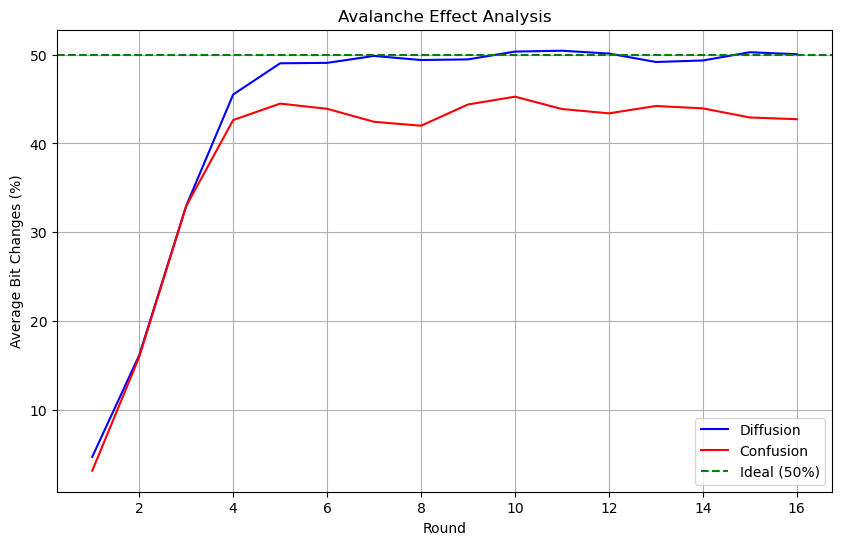

In [51]:
pt = "123456ABCD132536"
key = "AABB09182736CCDD"
encrypt_function = encrypt
diffusion_results, confusion_results = run_comprehensive_avalanche_tests(pt, key, encrypt_function)
plot_avalanche_effects(diffusion_results, confusion_results)

### Słabe klucze to takie, które nie produkują różnych (albo produkują ograniczoną ilość < 16) kluczy dla kolejnych rund, przykładowo "0000000000000000" "FFFFFFFFFFFFFFFF" przykład poniżej:

In [34]:
pt = "123456ABCD132536"
key = "FFFFFFFFFFFFFFFF"

rkb, rk = generate_round_keys(key)

print("Plain Text: ", hex2bin(pt))
print("Encryption")
cipher_text = bin2hex(encrypt(pt, rkb, rk))
print("Cipher Text : ", cipher_text)

Plain Text:  0001001000110100010101101010101111001101000100110010010100110110
Encryption
After initial permutation 0001010010100111110101100111100000011000110010100001100010101101
Round  1 
 left:  00011000110010100001100010101101 
 right:  10001010101001011101001101001000 
 round key:  111111111111111111111111111111111111111111111111
Round  2 
 left:  10001010101001011101001101001000 
 right:  10011110000110000001111100111111 
 round key:  111111111111111111111111111111111111111111111111
Round  3 
 left:  10011110000110000001111100111111 
 right:  00010000010111001001100001111110 
 round key:  111111111111111111111111111111111111111111111111
Round  4 
 left:  00010000010111001001100001111110 
 right:  00110110010111101111000110000010 
 round key:  111111111111111111111111111111111111111111111111
Round  5 
 left:  00110110010111101111000110000010 
 right:  10110001110111001010011010010011 
 round key:  111111111111111111111111111111111111111111111111
Round  6 
 left:  10110001110111001

## 2. DES 4 SBox każdy 4x16, wartości 0-255

In [43]:

sbox_modified = [
    [
        [14, 64, 213, 1, 2, 155, 111, 8, 145, 89, 76, 203, 95, 190, 80, 37],
        [99, 255, 128, 64, 32, 16, 8, 4, 167, 205, 132, 91, 45, 10, 98, 167],
        [201, 102, 33, 150, 177, 122, 44, 89, 34, 56, 78, 90, 123, 234, 56, 78],
        [45, 167, 89, 234, 198, 0, 77, 123, 187, 34, 56, 78, 90, 12, 34, 56]
    ],
    [
        [189, 45, 167, 23, 156, 78, 90, 234, 12, 45, 67, 89, 123, 45, 67, 89],
        [234, 156, 78, 90, 12, 34, 56, 78, 90, 123, 45, 67, 89, 12, 34, 56],
        [78, 90, 123, 45, 67, 89, 12, 34, 56, 78, 90, 123, 45, 67, 89, 12],
        [34, 56, 78, 90, 123, 45, 67, 89, 12, 34, 56, 78, 90, 123, 45, 67]
    ],
    [
        [89, 12, 34, 56, 78, 90, 123, 45, 67, 89, 12, 34, 56, 78, 90, 123],
        [45, 67, 89, 12, 34, 56, 78, 90, 123, 45, 67, 89, 12, 34, 56, 78],
        [90, 123, 45, 67, 89, 12, 34, 56, 78, 90, 123, 45, 67, 89, 12, 34],
        [56, 78, 90, 123, 45, 67, 89, 12, 34, 56, 78, 90, 123, 45, 67, 89]
    ],
    [
        [12, 34, 56, 78, 90, 123, 45, 67, 89, 12, 34, 56, 78, 90, 123, 45],
        [67, 89, 12, 34, 56, 78, 90, 123, 45, 67, 89, 12, 34, 56, 78, 90],
        [123, 45, 67, 89, 12, 34, 56, 78, 90, 123, 45, 67, 89, 12, 34, 56],
        [78, 90, 123, 45, 67, 89, 12, 34, 56, 78, 90, 123, 45, 67, 89, 12]
    ]
]

def encrypt_modified(pt, rkb, rk, num_rounds=16, print_rounds=True):

    pt = hex2bin(pt)
    pt = permute(pt, initial_perm, 64)

    if print_rounds:
        print("After initial permutation", pt)
 
    left = pt[0:32]
    right = pt[32:64]
    
    for i in range(0, num_rounds):
        right_expanded = permute(right, exp_d, 48)
        xor_x = xor(right_expanded, rkb[i])
        
        sbox_str = ""
        for j in range(0, 4):  # 4 S-boxes instead of 8
            # Take 12 bits for each S-box (48 bits total / 4 S-boxes = 12 bits each)
            twelve_bits = xor_x[j * 12:(j + 1) * 12]
            
            # First and last bits determine row (2 bits = 4 rows)
            row = bin2dec(int(twelve_bits[0] + twelve_bits[11]))
            
            # Middle 4 bits determine column (4 bits = 16 columns)
            col = bin2dec(int(twelve_bits[1:5]))
            
            # Get value from S-box (0-255) and convert to 8-bit binary
            val = sbox_modified[j][row][col]
            val_bin = dec2bin(val)
            
            # Ensure 8-bit output
            while len(val_bin) < 8:
                val_bin = '0' + val_bin
                
            sbox_str = sbox_str + val_bin

        sbox_str = permute(sbox_str, per, 32)
 
        result = xor(left, sbox_str)
        left = result
 
        if(i != num_rounds - 1):
            left, right = right, left
        if print_rounds:
            print("Round ", i + 1, "\n left: ", left,
                "\n right: ", right, "\n round key: ", hex2bin(rk[i]))

    combine = left + right
 
    cipher_text = permute(combine, final_perm, 64)
    return cipher_text
        

In [44]:
pt = "123456ABCD132536"
key = "AABB09182736CCDD"

rkb, rk = generate_round_keys(key)

print("Plain Text: ", hex2bin(pt))
print("Encryption")
cipher_text = bin2hex(encrypt_modified(pt, rkb, rk))
print("Cipher Text : ", cipher_text)
 
print("Decryption")
rkb_rev = rkb[::-1]
rk_rev = rk[::-1]
text = bin2hex(encrypt_modified(cipher_text, rkb_rev, rk_rev))
print("Plain Text : ", text)

Plain Text:  0001001000110100010101101010101111001101000100110010010100110110
Encryption
After initial permutation 0001010010100111110101100111100000011000110010100001100010101101
Round  1 
 left:  00011000110010100001100010101101 
 right:  10101000100110000011011010011010 
 round key:  000110010100110011010000011100101101111010001100
Round  2 
 left:  10101000100110000011011010011010 
 right:  00100000000111010010100011001101 
 round key:  010001010110100001011000000110101011110011001110
Round  3 
 left:  00100000000111010010100011001101 
 right:  10110110110010110101100001010010 
 round key:  000001101110110110100100101011001111010110110101
Round  4 
 left:  10110110110010110101100001010010 
 right:  10011010011000100110101011011101 
 round key:  110110100010110100000011001010110110111011100011
Round  5 
 left:  10011010011000100110101011011101 
 right:  00001100010010110000111010010100 
 round key:  011010011010011000101001111111101100100100010011
Round  6 
 left:  00001100010010110

Testing Diffusion (average over all plaintext bits):
------------------------------------------------------------
Round 1: Average 2.44 bits changed (3.81%)
Round 2: Average 6.41 bits changed (10.01%)
Round 3: Average 11.62 bits changed (18.16%)
Round 4: Average 14.72 bits changed (23.00%)
Round 5: Average 16.12 bits changed (25.20%)
Round 6: Average 17.22 bits changed (26.90%)
Round 7: Average 17.50 bits changed (27.34%)
Round 8: Average 17.95 bits changed (28.05%)
Round 9: Average 18.23 bits changed (28.49%)
Round 10: Average 18.70 bits changed (29.22%)
Round 11: Average 19.16 bits changed (29.93%)
Round 12: Average 18.84 bits changed (29.44%)
Round 13: Average 18.53 bits changed (28.96%)
Round 14: Average 18.67 bits changed (29.17%)
Round 15: Average 19.03 bits changed (29.74%)
Round 16: Average 19.64 bits changed (30.69%)

Testing Confusion (average over all key bits):
------------------------------------------------------------
Round 1: Average 1.44 bits changed (2.25%)
Round 2: A

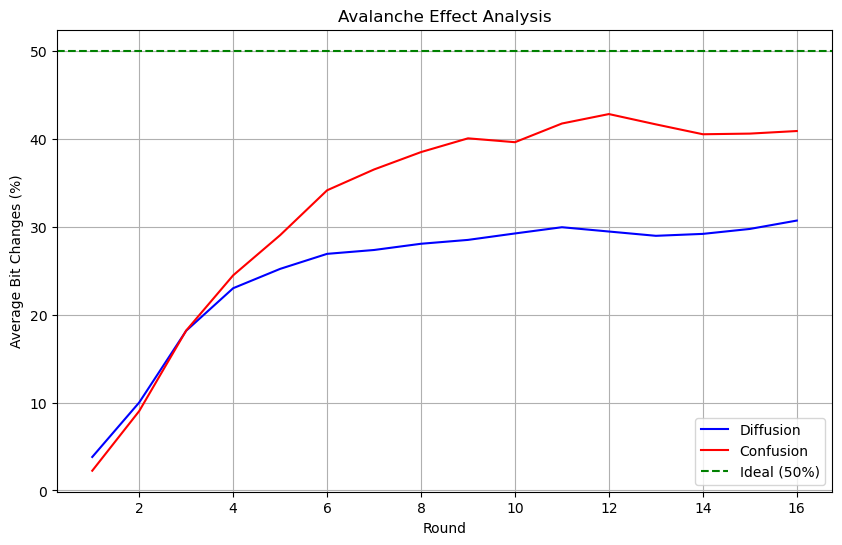

In [52]:
pt = "123456ABCD132536"
key = "AABB09182736CCDD"
encrypt_function = encrypt_modified
diffusion_results, confusion_results = run_comprehensive_avalanche_tests(pt, key, encrypt_function)
plot_avalanche_effects(diffusion_results, confusion_results)

## Jak widać zmodyfikowana wersja działa dużo gorzej